# Machine Learning Example Case: 
House Sale Price Prediction (like Zillow's "zestimate") 

When you see a line starting with "TASK", do that task!

### TASK: Click on the next cell and press shift-enter
You will get the code in it get executed.   
The result of last command or representation of last varible in that cell will be displayed 

In [1]:
import pandas as pd
housing = pd.read_csv('data/housing_processed.csv')
housing.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,GarageType_NA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,60,65.0,8450,7,5,2003,2003,196.0,Gd,...,0,0,0,0,0,0,0,0,0,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,TA,...,0,0,0,0,0,0,0,0,0,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,Gd,...,0,0,0,0,0,0,0,0,0,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,TA,...,0,0,0,0,0,0,0,0,0,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,Gd,...,0,0,0,0,0,0,0,0,0,1


### Filtering Columns
Some columns were not removed when equivalent coded ones were created

In [2]:
housing[["ExterQual","ExterQual_Coded"]].head()

,ExterQual,ExterQual_Coded
0,Gd,3
1,TA,2
2,Gd,3
3,TA,2
4,Gd,3


### Filtering in a series
dtypes returns a series   
filtering series and dataframes are similar

In [3]:
type(housing.dtypes==object)

pandas.core.series.Series

In [4]:
housing.dtypes[housing.dtypes==object]

ExterQual       object
ExterCond       object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
HeatingQC       object
CentralAir      object
KitchenQual     object
Functional      object
FireplaceQu     object
GarageFinish    object
GarageQual      object
GarageCond      object
PavedDrive      object
dtype: object

In [5]:
housing.dtypes[housing.dtypes==object].shape

(16,)

In [6]:
"SalePrice" in housing.columns 

True

### Removing Undesired Columns
In my case, my colleague had left above non-numeric columns in preprocessing, after creating corresponding coded versions

In [7]:
len(housing.columns)

238

In [8]:
# We could drop columns by name:
housing_ml = housing.drop(columns=["ExterQual"])

In [9]:
# or wholesale, keeping only numeric:
housing_ml = housing.loc[:,housing.dtypes != object]

In [10]:
len(housing_ml.columns)

222

# Separate Target into new Variable
- "SalePrice" is the target.    
 - The value we want to predict from other values (features) for a house.  
- Currently it is a column like the other features.   
- Scikit-learn needs 2 variables: features (X) and target (y) to be Predicted into its own 1-D array 

# NumPy
- Both Pandas and scikit-learn are build on top of NumPy
- scikit-learn can not directly work on dataframes
- X and y data type needs to be NumPy "ndarrays"

In [11]:
housing_ml.shape

(1460, 222)

In [12]:
# Split data as features and target
# take "SalePrice" values into its own 1-D array 
sale_price = housing_ml.pop('SalePrice')
type(sale_price)

pandas.core.series.Series

In [13]:
# pop removes the column
# "in place" operation
# now housing_ml has one less column
housing_ml.shape

(1460, 221)

In [14]:
y = sale_price.values
type(y)

numpy.ndarray

# See what other methods are available for ndarray

In [15]:
# press tab after putting cursor after dot "."
#y. #uncomment, press tab after . 

In [16]:
y.shape
# (1460,)
# it is equivalent to (1460)
# means it is a 1-d array

(1460,)

### TASK: get ndarray version of feature dataframe put it onto variable X

In [17]:
X = housing_ml.values

### TASK: check the shape of X

In [18]:
X.shape

(1460, 221)

### TASK: programmatically check if X and y has matching number of rows
You

In [19]:
X.shape[0] == y.shape[0]

True

# First Model
Q: What would you do if you had no features?

A: You would always estimatate the average house price.

We will have to do much better than that.  
We have so much data to base our decision on.   
It can still serve us as a baseline to compare.   
An inferior baseline could be: random in the range or max and min in training data. 

In [20]:
# Import estimator
from sklearn.dummy import DummyRegressor
# Instantiate estimator
# guess the mean every single time
mean_reg = DummyRegressor(strategy='mean')
# fit estimator
mean_reg.fit(X, y)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [21]:
# predict
mean_reg.predict(X)

array([180921.19589041, 180921.19589041, 180921.19589041, ...,
       180921.19589041, 180921.19589041, 180921.19589041])

## Evaluating The Model
scikit-learn regressors have a score function.   
It gives you how much better your model does compared to worst model
Technically: what percentage of the variance has decreased over the worst model

"Mean" *is* the worst model, so its score will be 0.

In [22]:
mean_reg.score(X, y)

0.0

## Fitting a linear model 
First, let's use only one feature 

In [23]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [24]:
X_lf = housing_ml[['LotFrontage']]

In [25]:
linear_model.fit(X_lf, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Above, you see that it used defaults to create the estimator.   
You could google "LinearRegression sklearn" and find the documentation:
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
to see the options for the other parameters.

In [26]:
y_pred = linear_model.predict(X_lf)

In [27]:
linear_model.score(X_lf, y)

0.11215612336205605

### Chart Showing the Linear Fit
matplotlib is the most common visualization library

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

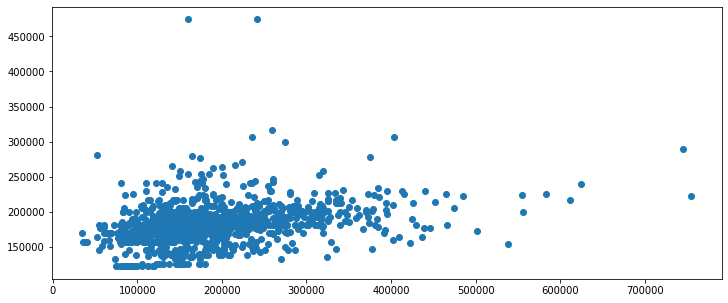

In [29]:
plt.figure(figsize=(12, 5))
plt.scatter(y, y_pred);

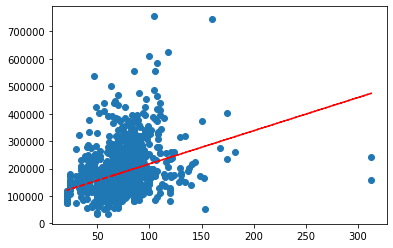

In [30]:
plt.scatter(X_lf,y)
plt.plot(X_lf,y_pred,'r--')

### TASK: add labels to these charts
search label:
https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py


### Task: try replacing scatter with plot
Do you see why scatter is needed for data rows.
Try also replacing plot with scatter. 

# Effect of using a Better predictor 
Ground Living Area should be better than Lot Frontage!

In [31]:
X_area = housing_ml[['GrLivArea']]

In [32]:
linear_model.fit(X_area, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now the linear_model has another model in it

In [33]:
y_pred2 = linear_model.predict(X_area)
linear_model.score(X_area, y)

0.5021486502718042

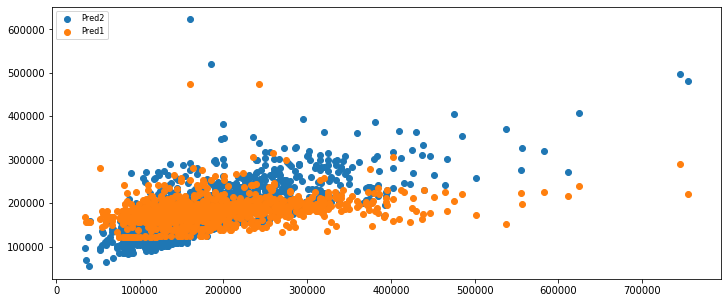

In [34]:
plt.figure(figsize=(12, 5))
blue = plt.scatter(y, y_pred2); # blue obviously better
orange = plt.scatter(y, y_pred); # orange
plt.legend((blue, orange),('Pred2', 'Pred1'), scatterpoints=1,
           loc='upper left',
           ncol=1,
           fontsize=8)

### TASK: add legend
which color is the prediction based on which feature

# Using all predictors!

In [35]:
# We had 81 columns (80 features) in original dataset,
# coded as 221 features!
X.shape

(1460, 221)

In [36]:
linear_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
y_pred3 = linear_model.predict(X)

In [38]:
linear_model.score(X, y)

0.9184728890914108

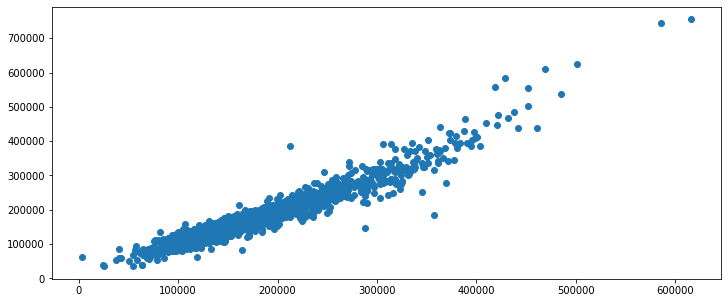

In [39]:
plt.figure(figsize=(12, 5))
plt.scatter(y_pred3, y);

In [40]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
#1
X_train, X_test, y_train, y_test = train_test_split(housing_ml, y, train_size=0.8, random_state=21)
#2
linear_model = LinearRegression()
scores = {}
rmseErrors = {}
for (columnName, columnData) in housing_ml.iteritems():  
    train_x = X_train[columnName].values.reshape(-1, 1)
    test_x = X_test[columnName].values.reshape(-1, 1)
    linear_model.fit(train_x, y_train)
    y_pred = linear_model.predict(test_x)
    score = linear_model.score(test_x, y_test)
    scores[columnName] = score
    rms = sqrt(mean_squared_error(y_test, y_pred))
    rmseErrors[columnName] = rms



In [41]:
from collections import OrderedDict
from operator import itemgetter
d = OrderedDict(sorted(scores.items(), key=itemgetter(1), reverse=True))
items = list(d.items())[:10]
for i in items:
    strResult = i[0] + ' ' + 'score: ' + str(i[1]) + ' rmse: ' + str(rmseErrors[i[0]])
    print(strResult)


OverallQual score: 0.6454631197278845 rmse: 49018.435788124974
ExterQual_Coded score: 0.49917534712671574 rmse: 58260.14865535065
GrLivArea score: 0.4442896667814059 rmse: 61369.55515927839
KitchenQual_Coded score: 0.43970293723342646 rmse: 61622.30113827634
TotalBsmtSF score: 0.42491266111423953 rmse: 62430.33167581401
1stFlrSF score: 0.4166679048480356 rmse: 62876.2562386846
GarageCars score: 0.41193116659665785 rmse: 63131.022100901646
GarageArea score: 0.4073263621599067 rmse: 63377.71018105261
BsmtQual_Coded score: 0.3409700148262621 rmse: 66831.5181312807
GarageFinish_Coded score: 0.3162849544224503 rmse: 68071.65468394083


In [42]:
# as we can see, 'OverallQual score' would give us the best prediction.

In [43]:
#3
from itertools import combinations
perm = combinations(items, 2)
perm = list(perm)
scores = {}
rmseErrors = {}
for columnName in perm:
    train_x = X_train[[columnName[0][0], columnName[1][0]]].values
    test_x = X_test[[columnName[0][0], columnName[1][0]]].values
    name = columnName[0][0] + ', ' + columnName[1][0]
    linear_model.fit(train_x, y_train)
    y_pred = linear_model.predict(test_x)
    score = linear_model.score(test_x, y_test)
    scores[name] = score
    rms = sqrt(mean_squared_error(y_test, y_pred))
    rmseErrors[name] = rms



In [44]:
d = OrderedDict(sorted(scores.items(), key=itemgetter(1), reverse=True))
items = list(d.items())[:10]
for i in items:
    strResult = i[0] + ' ' + 'score: ' + str(i[1]) + ' rmse: ' + str(rmseErrors[i[0]])
    print(strResult)


OverallQual, 1stFlrSF score: 0.7173882583039418 rmse: 43764.68831784155
OverallQual, TotalBsmtSF score: 0.7067911081524372 rmse: 44577.66409611637
OverallQual, GrLivArea score: 0.6921986779040231 rmse: 45673.467009316504
OverallQual, GarageArea score: 0.6813946935673895 rmse: 46468.13490082074
OverallQual, KitchenQual_Coded score: 0.6730869536074612 rmse: 47070.07230442363
OverallQual, GarageCars score: 0.6723247870365776 rmse: 47124.910051666164
OverallQual, ExterQual_Coded score: 0.668014734352153 rmse: 47433.824630568364
OverallQual, BsmtQual_Coded score: 0.6566660974647347 rmse: 48237.75463112186
OverallQual, GarageFinish_Coded score: 0.651902046585978 rmse: 48571.27166300007
ExterQual_Coded, 1stFlrSF score: 0.6364054863411375 rmse: 49640.64317074208


In [45]:
train_x = X_train.values
test_x = X_test.values
linear_model.fit(train_x, y_train)
y_pred = linear_model.predict(test_x)
score = linear_model.score(test_x, y_test)

rms = sqrt(mean_squared_error(y_test, y_pred))
result = 'All Features ' + 'Score: ' + str(score) + ' rmse: ' + str(rms)
result

'All Features Score: 0.8127547098527926 rmse: 35623.30345000717'

In [46]:
#based on the results for all the features and the 2 feature prediction, we can conclude that all features prediction had
# better prediction in overal

In [47]:
from sklearn.neighbors import KNeighborsRegressor
train_x = X_train.values
test_x = X_test.values

neigh5 = KNeighborsRegressor(n_neighbors=5)
neigh5.fit(train_x, y_train)
y_pred = neigh5.predict(test_x)
score = neigh5.score(test_x, y_test)

rms = sqrt(mean_squared_error(y_test, y_pred))

result = '5NN ' + 'Score: ' + str(score) + ' rmse: ' + str(rms)
result

'5NN Score: 0.6015421069563244 rmse: 51966.07983368139'

In [49]:
neigh10 = KNeighborsRegressor(n_neighbors=10)
neigh10.fit(train_x, y_train)
y_pred = neigh10.predict(test_x)
score = neigh10.score(test_x, y_test)

rms = sqrt(mean_squared_error(y_test, y_pred))

result = '10NN ' + 'Score: ' + str(score) + ' rmse: ' + str(rms)
result

'10NN Score: 0.5949812006956909 rmse: 52392.16317256475'

In [ ]:
#we can see that the results of the linear regression is better than KNN algorithm
#also linear regression is better for inference